# RMS Titanic
RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time the deadliest of a single ship in the West and the deadliest peacetime sinking of a superliner or cruise ship to date. With much public attention in the aftermath the disaster has since been the material of many artistic works and a founding material of the disaster film genre.¹

The use of Titanic data for Machine Learning matches the DEV's **Hello World!** and I consider it to be the gateway to the world of Data Science.

![](titanic.jpeg)

# The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

## Reading the data

- Here i'll import the dataset of Titanic and i'll see somethings that can be important for the futures predictions.

In [2]:
df=pd.read_csv("titanic_train.csv") 

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Here, we can see the percentage of null values.

In [5]:
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

- The percentage of null values in 'Cabin' is 77%, in 'Age' is 19% and in 'Embarked' is 0.22%.

- We can use a heat map to display these missing values.

<AxesSubplot:>

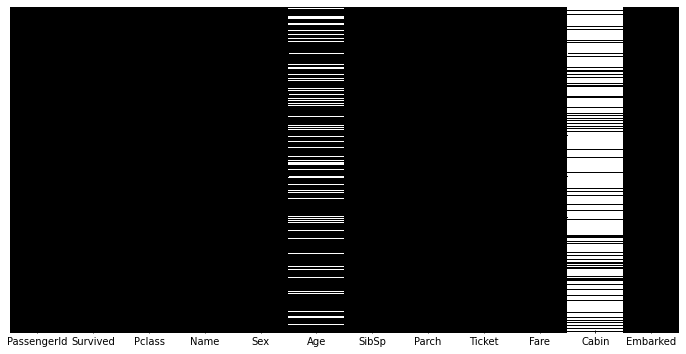

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False,cmap='cubehelix')

- Below, we can make a countplot to see graphically how the data of those who survived and those who did not survive are arranged, and also segregated by gender.

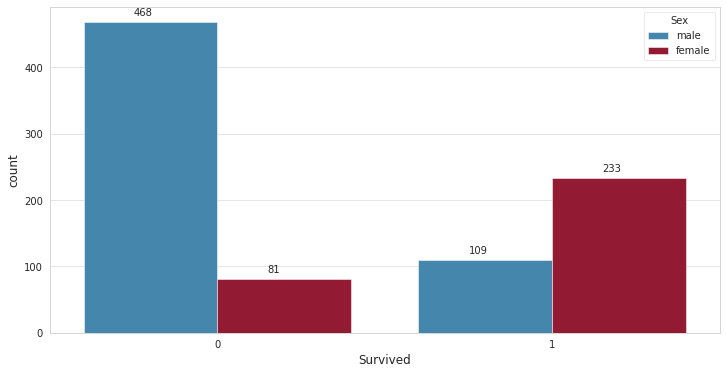

In [7]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
ax=sns.countplot(x='Survived',data=df,hue='Sex')
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))

- Below, we can make a countplot to see graphically how the data of those who survived and those who did not survive are arranged, and also segregated by class.

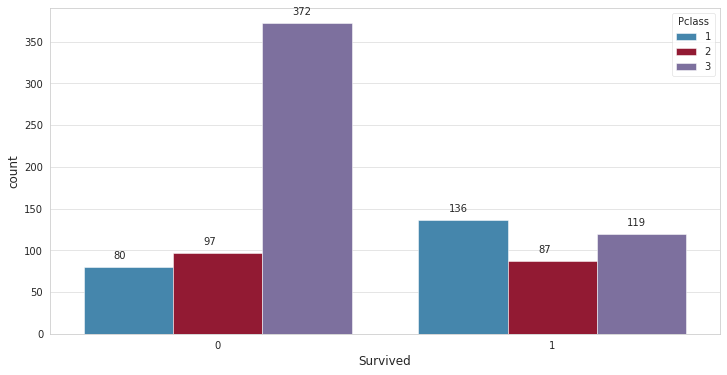

In [8]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
ax=sns.countplot(x='Survived',data=df,hue='Pclass')
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.09, p.get_height()+10))

- We can see here that the most Class that was survived is the first, but, the numbers is "approximately the same". In the other way, the class that have more dead is the third class. We can assume that this is because there are more people in that class.

<AxesSubplot:>

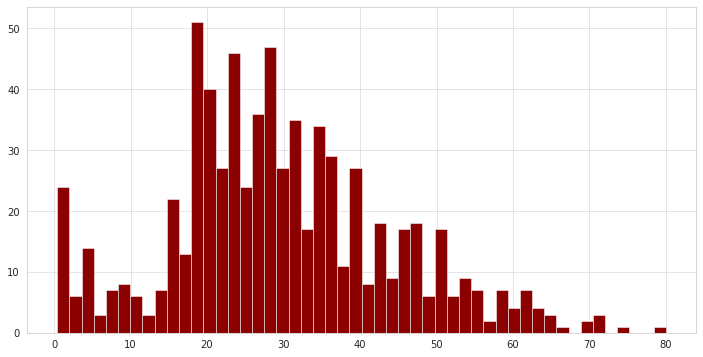

In [9]:
df['Age'].hist(bins=50,color='darkred',figsize=(12,6))

- Here we can see the distribution of age.
- How previously described, we can see the age distribution. We see that most are between 20 and 30 years old.

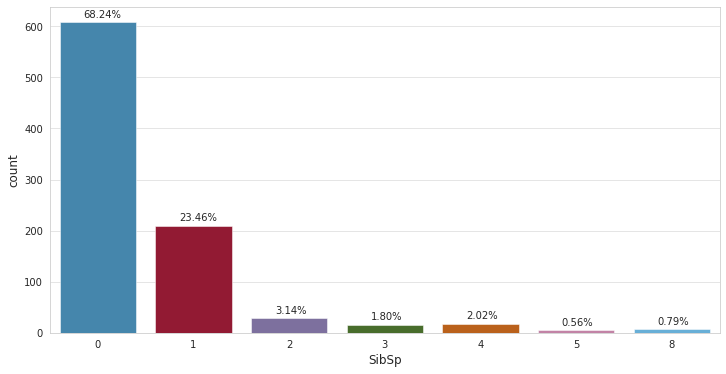

In [10]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
ax=sns.countplot(x='SibSp',data=df)
for p in ax.patches:
    ax.annotate('{:0.2f}%'.format(p.get_height()/len(df)*100), (p.get_x()+0.25, p.get_height()+10))

- When we do another countplot, we can see that, most of the trips were alone, some with 1 person (maybe a couple) and others with maybe your family.

<AxesSubplot:>

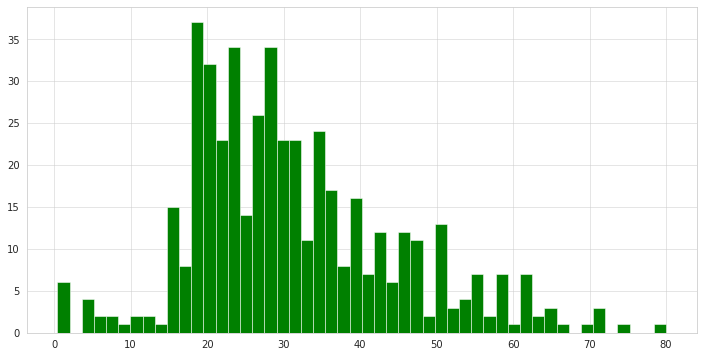

In [11]:
df[df['SibSp']==0]['Age'].hist(bins=50,color='green',figsize=(12,6))

- We see that most are between 20 and 30 years old, but now this is segregated by people who traveled alone.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

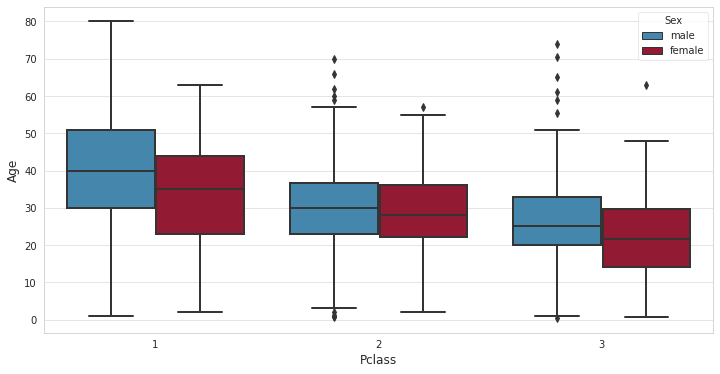

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=df)


- With the boxplot it is possible to see the average age by the class she traveled, we see that the older a person is, the greater their tendency to go to first class.

In [13]:
def corregir_idade(cols):
    idade=cols[0]
    classe=cols[1]
        
    if pd.isnull(idade):
        if classe==1:
            return 37
        elif classe==2:
            return 29
        else:
            return 23
    else:
        return idade

- As it was seen, there are missing data, age is one of the important columns that has some data like null, to make the correction we will create a function that will fill the age based on the average of the class to which it belongs.

In [14]:
df['Age']=df[['Age','Pclass']].apply(corregir_idade,axis=1)

- In the case of 'Cabin', as there is a lot of null data, correction is not viable. So, we can do a delete ['Cabin']

In [15]:
del df['Cabin']


<AxesSubplot:>

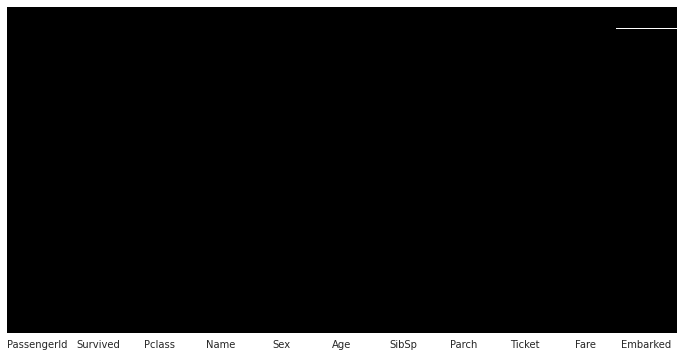

In [375]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False,cmap='cubehelix')

- There is still a missing data in "Embarked", using the data below we can correct the error.

In [16]:
df.dropna(inplace=True)

<AxesSubplot:>

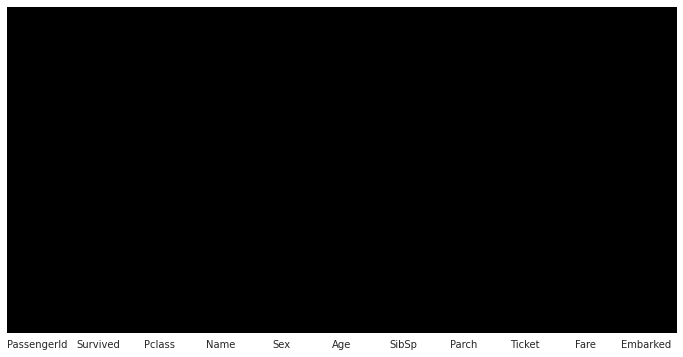

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False,cmap='cubehelix')

- Ok, now we are free of null data.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


- In some models it is preferable to work with numbers and not with strings, so if we go back to the data we will see that some important data like sex is in string, therefore, we can use a pandas function which is pd.get_dummies ()

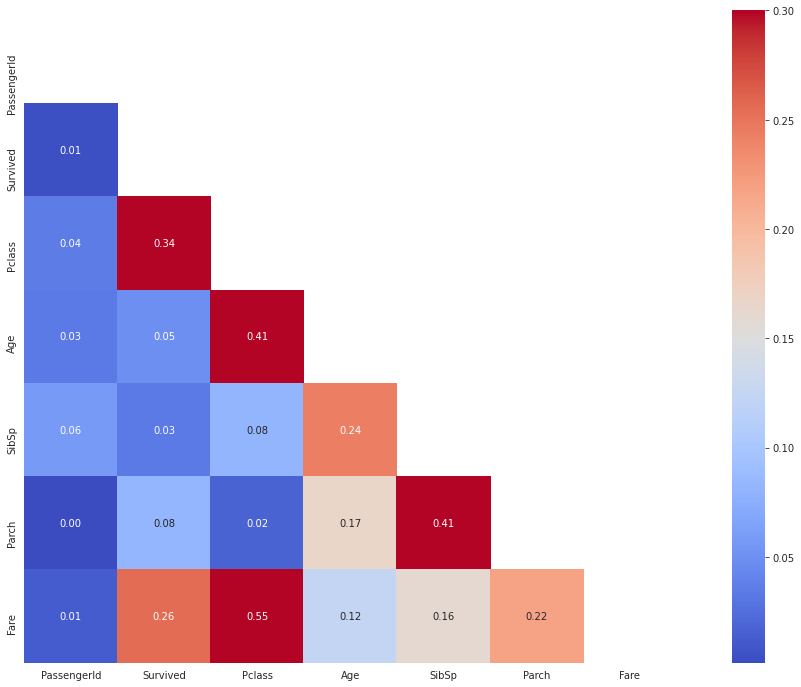

In [19]:
corr_data = df.corr()

mask = np.zeros_like(corr_data)

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20,12))
sns.heatmap(corr_data.abs(), annot=True, fmt='.2f',cmap='coolwarm',square=True,mask=mask, vmax=.3)
plt.show()

In [20]:
sexo=pd.get_dummies(df['Sex'],drop_first=True)


In [21]:
sexo

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [22]:
embarque=pd.get_dummies(df['Embarked'],drop_first=True)

In [23]:
embarque

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


- Now is the time for cleaning data that will certainly not influence whether you will die or not, the "Sex" has already been treated, so it can be removed, the "PassengerId" does not show such useful information, so it can be removed , the "Name" is not an important factor and where the passenger boarded may be important but further studies are necessary to see the importance of it.

In [24]:
df.drop(['Sex','PassengerId','Name','Embarked'],axis=1, inplace=True)

In [25]:
df=pd.concat([df,sexo,embarque],axis=1)

<AxesSubplot:>

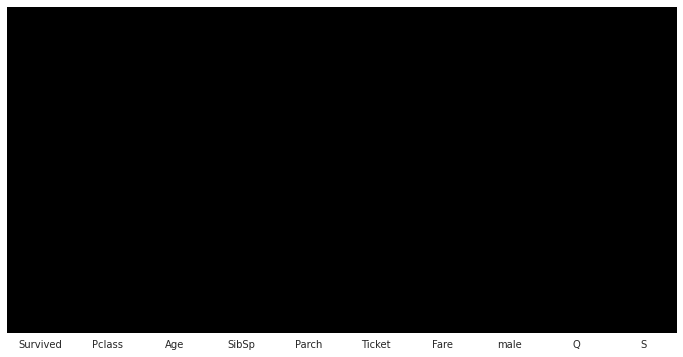

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False,cmap='cubehelix')

In [27]:
del df['Ticket']


In [28]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


# Machine Leaning
- We'll import the model, first we will use **Logistic Regression**.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
X_Treino,X_Teste,Y_Treino,Y_Teste=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.2)

In [32]:
print('The training dataset has {} people and the test dataset {} people.'.format(X_Treino.shape[0], X_Teste.shape[0]))

The training dataset has 711 people and the test dataset 178 people.


In [33]:
modelo_log=LogisticRegression(max_iter=1200)

In [34]:
modelo_log.fit(X_Treino,Y_Treino)

LogisticRegression(max_iter=1200)

In [35]:
acc_logReg = round(modelo_log.score(X_Treino,Y_Treino) * 100, 2)
print("Accuracy of the Logistic Regression model is: {}".format(acc_logReg))

Accuracy of the Logistic Regression model is: 80.31


In [36]:
predicao=modelo_log.predict(X_Teste)

# Test Data
- Now, i'll take the Test data.

In [37]:
teste=pd.read_csv("titanic_test.csv")
teste['Age']=teste[['Age','Pclass']].apply(corregir_idade,axis=1)
del teste['Cabin']
sexo=pd.get_dummies(teste['Sex'],drop_first=True)
embarque=pd.get_dummies(teste['Embarked'],drop_first=True)
teste.drop(['Sex','PassengerId','Name','Embarked'],axis=1, inplace=True)
teste=pd.concat([teste,sexo,embarque],axis=1)
del teste['Ticket']
teste=teste[teste.Fare.notnull()]
teste.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  417 non-null    int64  
 1   Age     417 non-null    float64
 2   SibSp   417 non-null    int64  
 3   Parch   417 non-null    int64  
 4   Fare    417 non-null    float64
 5   male    417 non-null    uint8  
 6   Q       417 non-null    uint8  
 7   S       417 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


<AxesSubplot:>

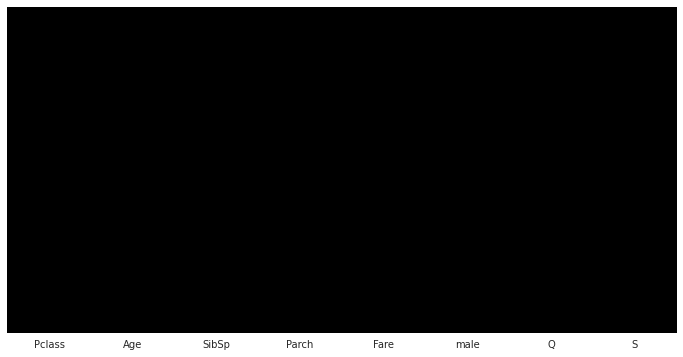

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(teste.isnull(),cbar=False, yticklabels=False,cmap='cubehelix')

In [39]:
survived=modelo_log.predict(teste)

In [40]:
teste['survived']=survived

In [41]:
teste

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,survived
0,3,34.5,0,0,7.8292,1,1,0,0
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,1,1,0,0
3,3,27.0,0,0,8.6625,1,0,1,0
4,3,22.0,1,1,12.2875,0,0,1,1
...,...,...,...,...,...,...,...,...,...
413,3,23.0,0,0,8.0500,1,0,1,0
414,1,39.0,0,0,108.9000,0,0,0,1
415,3,38.5,0,0,7.2500,1,0,1,0
416,3,23.0,0,0,8.0500,1,0,1,0


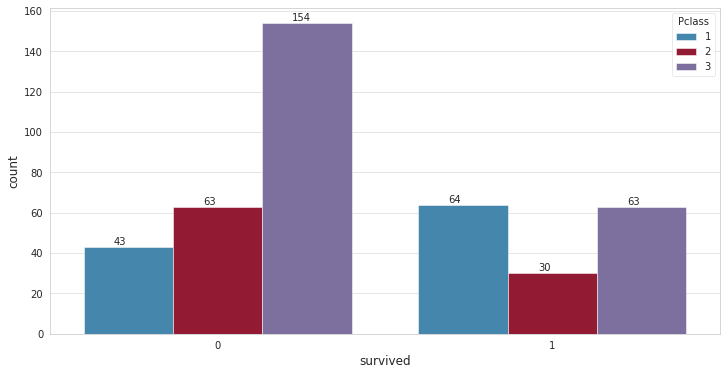

In [42]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
ax=sns.countplot(x='survived',data=teste,hue='Pclass')
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.09, p.get_height()+1))

In [43]:
eduardo = np.array([3,23, 0, 0, 7, 1, 0, 1]).reshape((1, -1))

### Would I survive? (Logistic Regression)

In [44]:
print(modelo_log.predict(eduardo))

[0]


### Oh, goddammit.

# Machine Leaning
- We'll import the model, now we will use **Decision Tree Classifier**.

In [45]:
from sklearn.tree import DecisionTreeClassifier
# criar um modelo de árvore de decisão
modelo_tree = DecisionTreeClassifier(max_depth=3)
modelo_tree.fit(X_Treino,Y_Treino)

# verificar a acurácia do modelo
acc_tree = round(modelo_tree.score(X_Treino,Y_Treino) * 100, 2)
print("Accuracy of the Decision Tree Classifie model is: {}".format(acc_tree))

Accuracy of the Decision Tree Classifie model is: 82.28


### Would I survive? (Decision Tree Classifier)

In [46]:
print(modelo_tree.predict(eduardo))

[0]


### Oh goddammit, goodbye ;(.

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
SEED = 42
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
results_tree = cross_val_score(modelo_tree, X_Treino, Y_Treino, cv=cv, scoring = 'accuracy')
results_log = cross_val_score(modelo_log, X_Treino, Y_Treino, cv=cv, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Average accuracy: {:.2f}%'.format(mean*100))
    print('Accuracy range: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
print("DecisionTreeClassifier")
intervalo(results_tree)
print("\n")
print("LogisticRegression")
intervalo(results_log)

DecisionTreeClassifier
Average accuracy: 81.72%
Accuracy range: [76.83% ~ 86.61%]


LogisticRegression
Average accuracy: 80.16%
Accuracy range: [76.94% ~ 83.39%]
